In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Problem Statement

---



>Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.



# Data Description

---



>The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

1. ID --Unique ID

2. Balance--Number of miles eligible for award travel

3. Qual_mile--Number of miles counted as qualifying for Topflight status

4. cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
5. cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
6. cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
    * 1 = under 5,000
    * 2 = 5,000 - 10,000
    * 3 = 10,001 - 25,000
    * 4 = 25,001 - 50,000
    * 5 = over 50,000

7. Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

8. Bonus_trans--Number of non-flight bonus transactions in the past 12 months

9. Flight_miles_12mo--Number of flight miles in the past 12 months

10. Flight_trans_12--Number of flight transactions in the past 12 months

11. Days_since_enrolled--Number of days since enrolled in flier program

12. Award--whether that person had award flight (free flight) or not


 

In [2]:
df=pd.read_csv("/content/EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [3]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.duplicated().sum()

0

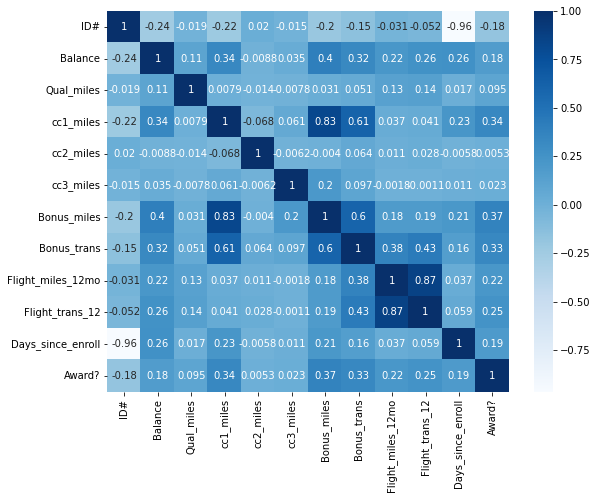

In [7]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

# Data-Preprocessing

In [8]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [9]:
df=df.drop(["ID#"], axis=1)

In [10]:
df.columns = df.columns.str.replace('?', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


# Heirarchical Clustering

In [11]:
df1=df.copy()

In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df1.iloc[:,1:])
df_norm.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


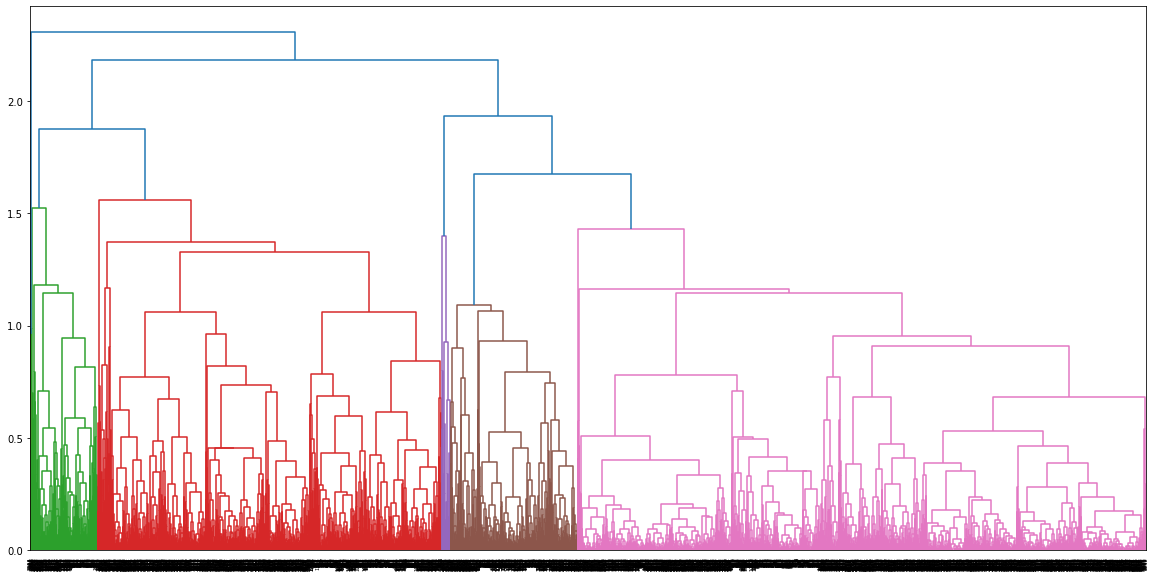

In [14]:
# create dendrogram
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [15]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [16]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [17]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [18]:
y_hc

array([2, 2, 2, ..., 0, 2, 2])

In [19]:
df1['cluster_id'] = y_hc

In [20]:
df2=df1.sort_values("cluster_id")
df2.iloc[:,[0,-1]]

,Balance,cluster_id
1999,327126,0
3167,17863,0
1513,124775,0
1512,4779,0
3168,28443,0
...,...,...
1756,63036,2
3594,27619,3
3583,160114,3
2015,53232,3


# K-Means Clustering

In [21]:
df3=df.copy()

In [22]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df3.iloc[:,1:])

In [23]:
scaled_df

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

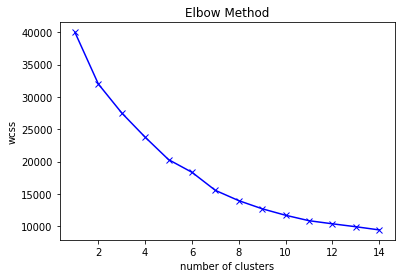

In [24]:
wcss =[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss, 'bx-')
plt.title("Elbow Method")
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

* The scree plot levels off at k=5 and let's use it to determine the clusters.

In [25]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [26]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [27]:
kmeans.inertia_

9439.65129951918

In [28]:
#Assign clusters to the data set
df3['kmeans_cluster_id'] = clusters_new.labels_+1

In [29]:
df3.groupby('kmeans_cluster_id').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
kmeans_cluster_id,,,,,,,,,,,
1,165308.601227,742.190184,2.171779,1.000000,1.000000,31084.294479,26.717791,5443.490798,15.736196,4648.490798,0.797546
2,113162.407948,152.137875,3.756691,1.000000,1.001622,39937.722628,18.926196,321.254663,0.966748,4880.991890,0.657745
3,48261.117485,104.349312,1.237328,1.000000,1.000393,4798.313163,6.888016,205.781532,0.635363,3714.844794,0.202358
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [30]:
df3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,kmeans_cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2


## Cluster-Wise

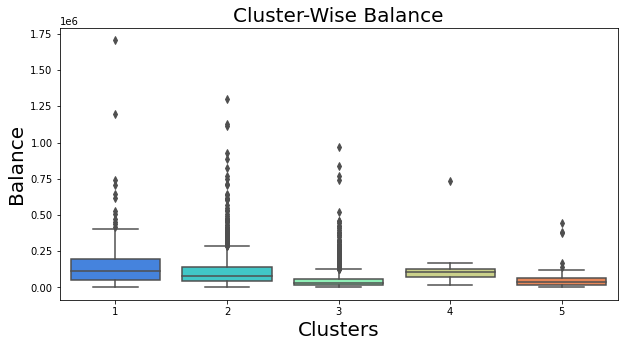

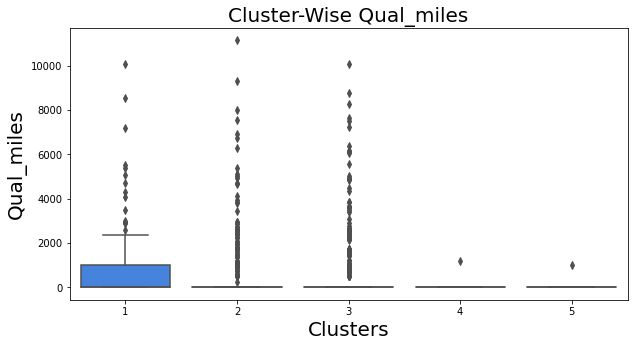

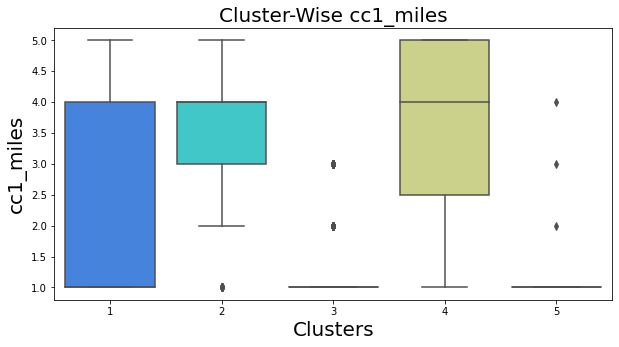

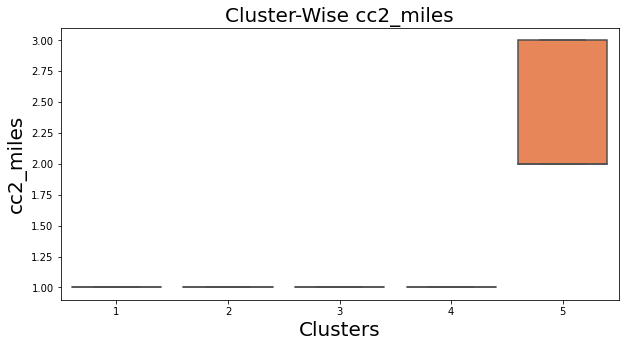

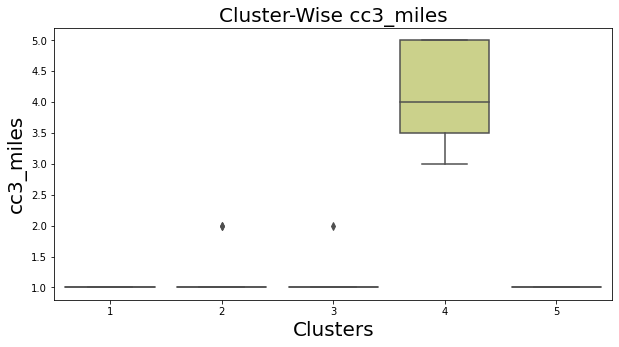

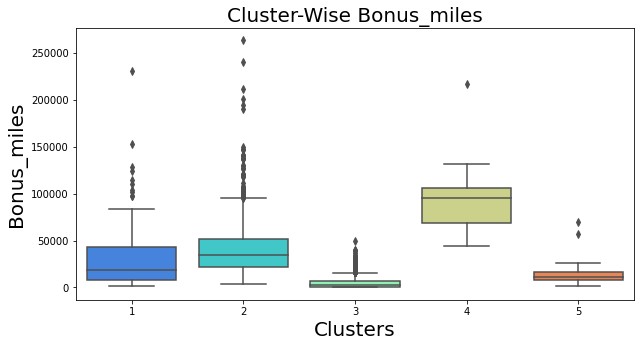

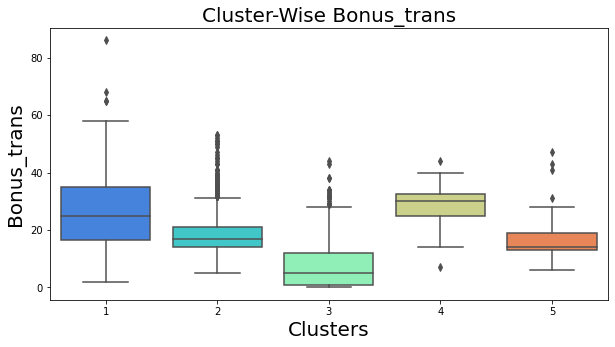

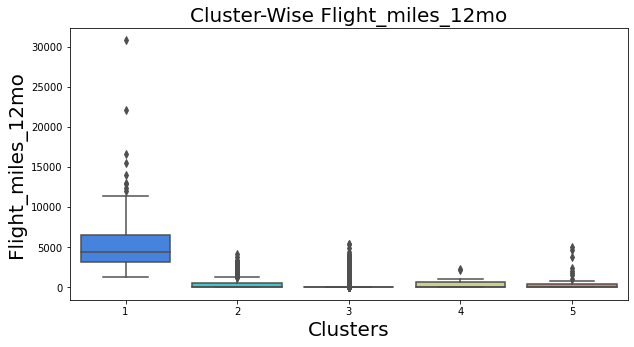

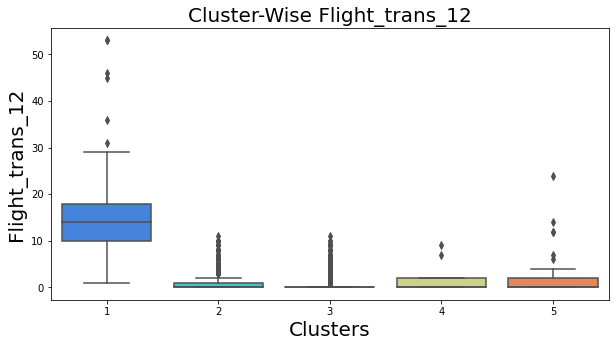

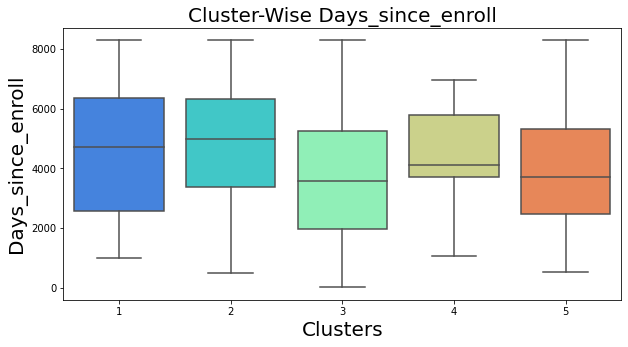

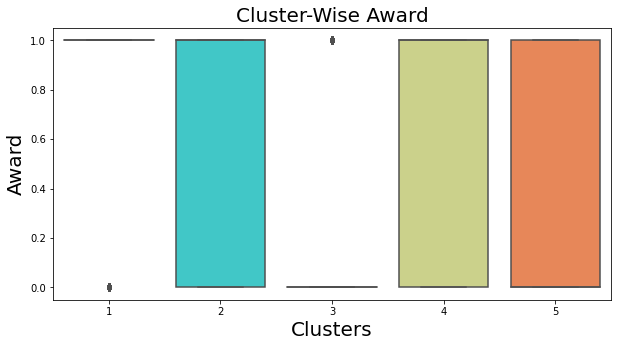

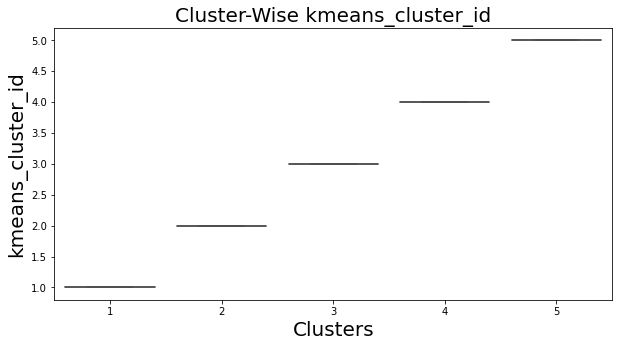

In [31]:
cols=df3.columns
for i in cols:
  plt.figure(figsize=(10,5))
  s=sns.boxplot(x='kmeans_cluster_id', y=i, data=df3,palette='rainbow')
  plt.title((f'Cluster-Wise {i}'), fontsize = 20)
  s.set_xlabel("Clusters", fontsize = 20)
  s.set_ylabel((f'{i}'), fontsize = 20)
  

# DB-Scan

In [32]:
df4=df.copy()

In [33]:
array = df4.values

In [34]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [35]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [36]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [37]:
dbscan = DBSCAN(eps=5, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=4)

In [38]:
#Noicy samples are given the label -1
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
np.array(np.unique(dbscan.labels_, return_counts=True)).T

array([[  -1,   12],
       [   0, 3931],
       [   1,   15],
       [   2,   28],
       [   3,    5],
       [   4,    4],
       [   5,    4]])

In [40]:
#assign clusters to the dataset
df4["clusterID_db"] = dbscan.labels_
df4.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterID_db
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [41]:
df4.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award                    0.370343
clusterID_db             0.027507
dtype: float64